В данном мини-проекте проведем разведочный анализ данных (EDA).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Загружаем и обрабатываем датафрейм.

In [2]:
df = pd.read_csv(r'C:\Users\yarus\Downloads\Проект\Проект\data\data.csv', encoding='1251')

In [3]:
df.head()

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TDoc,DR_TPay,DR_CDrugs,DR_NDrugs,...,DR_Prod,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
0,2022-08-11,10:15:35,2173,2004598,2,22577,Розничная реализация,18,45399,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,...,Д-р Редди с Лабораторис Лтд / Dr.REDDY's,1.0,41.08,51.0,12.0,925.0,2.000000e+11,205,1,1.0
1,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,261519,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,...,ФЛОРА КАВКАЗА ОАО,1.0,18.61,31.0,3.0,9.0,2.000100e+11,205,1,1.0
2,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,460864,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,...,КОРОЛЕВФАРМ ООО,1.0,132.69,209.0,20.0,9.0,2.000100e+11,205,1,2.0
3,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,172823,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,...,КОРОЛЕВФАРМ ООО,1.0,133.65,210.0,21.0,9.0,2.000100e+11,205,1,3.0
4,2022-08-11,10:33:56,2175,2004598,2,22577,Розничная реализация,18,79056,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,...,Новартис Фарма АГ,1.0,709.95,787.0,49.0,925.0,2.000000e+11,205,1,1.0


Настроим максимальное значение отображаемых колонок, а также формат значений с плавающей точкой.

In [4]:
pd.describe_option()

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.column_space No description available.
    [defa

In [5]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.float_format', '{:.2f}'.format)

Посмотрим изменился ли параметр.

In [6]:
pd.get_option('display.max_columns')

40

Посмотрим на типы данных в датафрейме.

In [7]:
df.dtypes

DR_Dat         object
DR_Tim         object
DR_NChk         int64
DR_NDoc         int64
DR_Apt          int64
DR_Kkm          int64
DR_TDoc        object
DR_TPay         int64
DR_CDrugs       int64
DR_NDrugs      object
DR_Suppl       object
DR_Prod        object
DR_Kol        float64
DR_CZak       float64
DR_CRoz       float64
DR_SDisc      float64
DR_CDisc      float64
DR_BCDisc     float64
DR_TabEmpl      int64
DR_VZak         int64
DR_Pos        float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4462 entries, 0 to 4461
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DR_Dat      4462 non-null   object 
 1   DR_Tim      4462 non-null   object 
 2   DR_NChk     4462 non-null   int64  
 3   DR_NDoc     4462 non-null   int64  
 4   DR_Apt      4462 non-null   int64  
 5   DR_Kkm      4462 non-null   int64  
 6   DR_TDoc     4462 non-null   object 
 7   DR_TPay     4462 non-null   int64  
 8   DR_CDrugs   4462 non-null   int64  
 9   DR_NDrugs   4462 non-null   object 
 10  DR_Suppl    4462 non-null   object 
 11  DR_Prod     4462 non-null   object 
 12  DR_Kol      4462 non-null   float64
 13  DR_CZak     4462 non-null   float64
 14  DR_CRoz     4462 non-null   float64
 15  DR_SDisc    4462 non-null   float64
 16  DR_CDisc    1765 non-null   float64
 17  DR_BCDisc   1765 non-null   float64
 18  DR_TabEmpl  4462 non-null   int64  
 19  DR_VZak     4462 non-null  

Посмотрим описательную статистику числовых столбцов.

In [9]:
df.describe()

,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TPay,DR_CDrugs,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
count,4462.00,4462.00,4462.00,4462.00,4462.00,4462.00,4462.00,4462.00,4462.00,4462.00,1765.00,1765.00,4462.00,4462.00,4462.00
mean,4903.14,10842995.33,10.84,18654.94,16.90,259227.09,1.03,241.64,306.05,10.56,156.56,200005828567.16,91.74,1.04,2.68
std,1839.70,6107181.40,6.11,6235.13,1.45,299073.90,0.54,454.56,532.17,31.37,327.36,4942136.81,108.08,0.18,2.75
min,1698.00,2004595.00,2.00,8712.00,15.00,3.00,0.01,0.01,0.01,0.00,9.00,200000000022.00,25.00,1.00,1.00
25%,4187.00,6003620.00,6.00,9907.00,15.00,29060.00,1.00,36.64,52.00,0.00,9.00,200000000022.00,37.00,1.00,1.00
50%,4877.50,11007039.00,11.00,22569.00,18.00,187304.00,1.00,103.78,137.00,0.00,9.00,200010003934.00,53.00,1.00,2.00
75%,5472.75,18002536.00,18.00,22589.00,18.00,377589.00,1.00,299.06,391.75,7.00,35.00,200010020692.00,123.00,1.00,3.00
max,8490.00,18002543.00,18.00,23925.00,18.00,1504498.00,20.00,11851.13,12345.00,650.00,941.00,200010027972.00,605.00,2.00,24.00


На количество столбцов и строк.

In [10]:
df.shape

(4462, 21)

In [11]:
df.size

93702

In [12]:
df.index

RangeIndex(start=0, stop=4462, step=1)

Выведем список наименований колонок.

In [13]:
df.columns

Index(['DR_Dat', 'DR_Tim', 'DR_NChk', 'DR_NDoc', 'DR_Apt', 'DR_Kkm', 'DR_TDoc',
       'DR_TPay', 'DR_CDrugs', 'DR_NDrugs', 'DR_Suppl', 'DR_Prod', 'DR_Kol',
       'DR_CZak', 'DR_CRoz', 'DR_SDisc', 'DR_CDisc', 'DR_BCDisc', 'DR_TabEmpl',
       'DR_VZak', 'DR_Pos'],
      dtype='object')

Оставим только интересующие нас столбцы с данными.

In [14]:
our_cols = ['DR_Dat', 'DR_Tim', 'DR_NChk', 'DR_NDoc', 'DR_Apt', 'DR_NDrugs', 'DR_Kol',
       'DR_CZak', 'DR_CRoz', 'DR_SDisc', 'DR_TPay', 'DR_CDrugs', 'DR_Suppl', 'DR_CDisc', 'DR_BCDisc', 'DR_TabEmpl', 'DR_VZak', 'DR_Pos', 'DR_CDisc']

In [15]:
df = df[our_cols]

In [16]:
df.head()

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_NDrugs,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_TPay,DR_CDrugs,DR_Suppl,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos,DR_CDisc
0,2022-08-11,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925.00,200000000492.00,205,1,1.00,925.00
1,2022-08-11,10:27:46,2174,2004598,2,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,1.00,18.61,31.00,3.00,15,261519,Катрен г.Химки,9.00,200010010204.00,205,1,1.00,9.00
2,2022-08-11,10:27:46,2174,2004598,2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,1.00,132.69,209.00,20.00,15,460864,Катрен г.Химки,9.00,200010010204.00,205,1,2.00,9.00
3,2022-08-11,10:27:46,2174,2004598,2,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,1.00,133.65,210.00,21.00,15,172823,Катрен г.Химки,9.00,200010010204.00,205,1,3.00,9.00
4,2022-08-11,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925.00,200000000492.00,205,1,1.00,925.00


In [17]:
df.shape

(4462, 19)

Переименнуем название столбцов, для более удобного взаимодействия.

In [18]:
df.columns = ['dt', 'c_time', 'nchk', 'ndoc', 'apt', 'drug', 'kol',
       'zak', 'roz', 'disc', 'pay_type', 'drug_id', 'suppl', 'disc_id', 'disc_barcode', 'empl', 'vzak', 'pos', 'cdisc']

In [19]:
df.head()

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos,cdisc
0,2022-08-11,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925.00,200000000492.00,205,1,1.00,925.00
1,2022-08-11,10:27:46,2174,2004598,2,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,1.00,18.61,31.00,3.00,15,261519,Катрен г.Химки,9.00,200010010204.00,205,1,1.00,9.00
2,2022-08-11,10:27:46,2174,2004598,2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,1.00,132.69,209.00,20.00,15,460864,Катрен г.Химки,9.00,200010010204.00,205,1,2.00,9.00
3,2022-08-11,10:27:46,2174,2004598,2,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,1.00,133.65,210.00,21.00,15,172823,Катрен г.Химки,9.00,200010010204.00,205,1,3.00,9.00
4,2022-08-11,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925.00,200000000492.00,205,1,1.00,925.00


Приведем тип данных полей к необходимым.

In [20]:
df.dtypes

dt               object
c_time           object
nchk              int64
ndoc              int64
apt               int64
drug             object
kol             float64
zak             float64
roz             float64
disc            float64
pay_type          int64
drug_id           int64
suppl            object
disc_id         float64
disc_barcode    float64
empl              int64
vzak              int64
pos             float64
cdisc           float64
dtype: object

In [21]:
df['disc_barcode'].dtype

dtype('float64')

In [22]:
df['disc_barcode'] = df['disc_barcode'].astype('str').replace('\.0', '', regex=True)

In [23]:
df.dtypes

dt               object
c_time           object
nchk              int64
ndoc              int64
apt               int64
drug             object
kol             float64
zak             float64
roz             float64
disc            float64
pay_type          int64
drug_id           int64
suppl            object
disc_id         float64
disc_barcode     object
empl              int64
vzak              int64
pos             float64
cdisc           float64
dtype: object

In [24]:
df['disc_id'] = df['disc_id'].astype('str').replace('\.0', '', regex=True)

In [25]:
df.head()

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos,cdisc
0,2022-08-11,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925,200000000492,205,1,1.00,925.00
1,2022-08-11,10:27:46,2174,2004598,2,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,1.00,18.61,31.00,3.00,15,261519,Катрен г.Химки,9,200010010204,205,1,1.00,9.00
2,2022-08-11,10:27:46,2174,2004598,2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,1.00,132.69,209.00,20.00,15,460864,Катрен г.Химки,9,200010010204,205,1,2.00,9.00
3,2022-08-11,10:27:46,2174,2004598,2,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,1.00,133.65,210.00,21.00,15,172823,Катрен г.Химки,9,200010010204,205,1,3.00,9.00
4,2022-08-11,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925,200000000492,205,1,1.00,925.00


Поля с датами также приведем к временному и более читаемому типу данных. 

In [26]:
df['dt'] = pd.to_datetime(df['dt']).dt.strftime('%d.%m.%Y')

In [27]:
pd.to_datetime(df['dt']).dt.day_of_year.head()

0    312
1    312
2    312
3    312
4    312
Name: dt, dtype: int64

In [28]:
df.dtypes

dt               object
c_time           object
nchk              int64
ndoc              int64
apt               int64
drug             object
kol             float64
zak             float64
roz             float64
disc            float64
pay_type          int64
drug_id           int64
suppl            object
disc_id          object
disc_barcode     object
empl              int64
vzak              int64
pos             float64
cdisc           float64
dtype: object

In [29]:
df.head()

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos,cdisc
0,11.08.2022,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925,200000000492,205,1,1.00,925.00
1,11.08.2022,10:27:46,2174,2004598,2,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,1.00,18.61,31.00,3.00,15,261519,Катрен г.Химки,9,200010010204,205,1,1.00,9.00
2,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,1.00,132.69,209.00,20.00,15,460864,Катрен г.Химки,9,200010010204,205,1,2.00,9.00
3,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,1.00,133.65,210.00,21.00,15,172823,Катрен г.Химки,9,200010010204,205,1,3.00,9.00
4,11.08.2022,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925,200000000492,205,1,1.00,925.00


Заменим цифровые значения в столбце вида закупки на именованный. 

In [30]:
df['vzak'].unique()

array([1, 2], dtype=int64)

In [31]:
df['vzak'].astype('str').replace('1', 'Обычный').replace('2', 'Интернет')

0       Обычный
1       Обычный
2       Обычный
3       Обычный
4       Обычный
         ...   
4457    Обычный
4458    Обычный
4459    Обычный
4460    Обычный
4461    Обычный
Name: vzak, Length: 4462, dtype: object

In [32]:
d ={
    '1': 'Обычный',
    '2': 'Интернет'
}

df['vzak'].map(d)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
4457    NaN
4458    NaN
4459    NaN
4460    NaN
4461    NaN
Name: vzak, Length: 4462, dtype: object

In [33]:
df.head()

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos,cdisc
0,11.08.2022,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925,200000000492,205,1,1.00,925.00
1,11.08.2022,10:27:46,2174,2004598,2,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,1.00,18.61,31.00,3.00,15,261519,Катрен г.Химки,9,200010010204,205,1,1.00,9.00
2,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,1.00,132.69,209.00,20.00,15,460864,Катрен г.Химки,9,200010010204,205,1,2.00,9.00
3,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,1.00,133.65,210.00,21.00,15,172823,Катрен г.Химки,9,200010010204,205,1,3.00,9.00
4,11.08.2022,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925,200000000492,205,1,1.00,925.00


Проверим на наличие пропусков в данных.

In [34]:
df.isna().any()

dt              False
c_time          False
nchk            False
ndoc            False
apt             False
drug            False
kol             False
zak             False
roz             False
disc            False
pay_type        False
drug_id         False
suppl           False
disc_id         False
disc_barcode    False
empl            False
vzak            False
pos             False
cdisc            True
dtype: bool

In [35]:
df[df.isna().values.any(axis=1)].head()

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos,cdisc
15,11.08.2022,11:00:23,2178,2004598,2,"НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /ЛЕККО/",1.00,12.94,18.00,0.00,18,496504,Катрен г.Химки,nan,nan,205,1,1.00,NaN
16,11.08.2022,11:00:23,2178,2004598,2,"НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /ЛЕККО/",1.00,12.94,18.00,0.00,18,496504,Катрен г.Химки,nan,nan,205,1,2.00,NaN
20,11.08.2022,11:31:34,2181,2004598,2,ЛАКТОФИЛЬТРУМ 500МГ. №60 ТАБ.,1.00,408.63,560.00,0.00,18,14120,Пульс,nan,nan,205,1,1.00,NaN
21,11.08.2022,11:31:34,2181,2004598,2,ФЕСТАЛ №40 ДРАЖЕ,1.00,333.74,458.00,0.00,18,78641,ВИТТА КОМПАНИ ООО,nan,nan,205,1,2.00,NaN
22,11.08.2022,11:36:05,2182,2004598,2,ДОКТОР МОМ №20 ПАСТИЛКИ МАЛИНА,1.00,141.55,200.00,0.00,15,18849,Пульс,nan,nan,205,1,1.00,NaN


In [36]:
df.iloc[15]

dt                                                    11.08.2022
c_time                                                  11:00:23
nchk                                                        2178
ndoc                                                     2004598
apt                                                            2
drug            НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /ЛЕККО/
kol                                                         1.00
zak                                                        12.94
roz                                                        18.00
disc                                                        0.00
pay_type                                                      18
drug_id                                                   496504
suppl                                             Катрен г.Химки
disc_id                                                      nan
disc_barcode                                                 nan
empl                     

1. Заполним все пропуски одиаковым значением, нулем.

In [37]:
df.fillna(0).iloc[15]

dt                                                    11.08.2022
c_time                                                  11:00:23
nchk                                                        2178
ndoc                                                     2004598
apt                                                            2
drug            НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /ЛЕККО/
kol                                                         1.00
zak                                                        12.94
roz                                                        18.00
disc                                                        0.00
pay_type                                                      18
drug_id                                                   496504
suppl                                             Катрен г.Химки
disc_id                                                      nan
disc_barcode                                                 nan
empl                     

2. Заполним пропуски методом интерполяции.

In [38]:
df['cdisc'].interpolate(method='linear').iloc[15]

9.0

3. Удалим все пропуски.

In [39]:
df.dropna(axis=1).shape

(4462, 18)

Посмотрим на количество значений в датафрейме в разрезе некоторых значений.

In [40]:
df['pay_type'].value_counts()

18    2820
15    1642
Name: pay_type, dtype: int64

In [41]:
df.apt.value_counts()

18    1207
2      979
11     870
6      511
13     322
17     243
15     177
7      153
Name: apt, dtype: int64

In [42]:
df.apt.value_counts(normalize=True)

18   0.27
2    0.22
11   0.19
6    0.11
13   0.07
17   0.05
15   0.04
7    0.03
Name: apt, dtype: float64

Посмотрим на уникальные значения в одном из столбцов.

In [43]:
df.pos.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 23., 24., 22.])

In [44]:
df.pos.value_counts().head()

1.00    2019
2.00     971
3.00     528
4.00     301
5.00     178
Name: pos, dtype: int64

Построим распределение для этого столбца.

<AxesSubplot:>

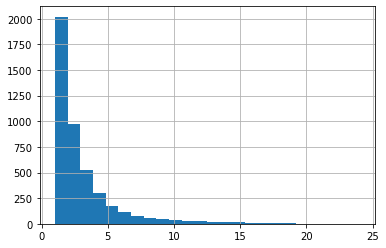

In [45]:
df.pos.hist(bins=24)

Построим также тепловую карту для корреляций, используя библиотеку seaborn.

<AxesSubplot:>

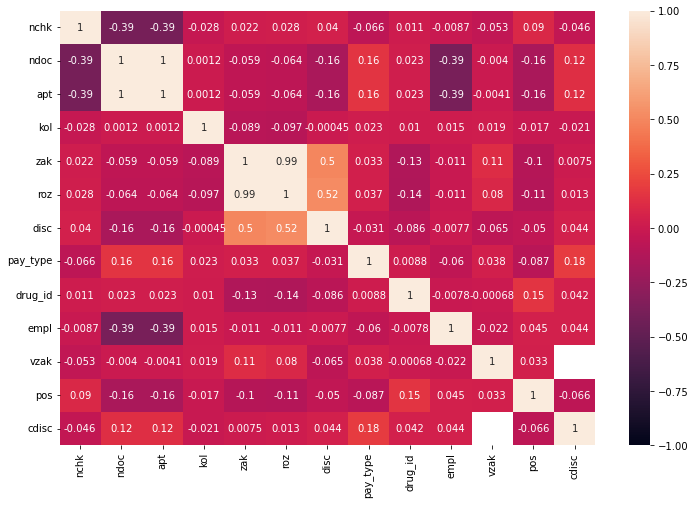

In [46]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), vmax=1, vmin=-1, annot=True)

Рассмотрим также иной вариант задания габаритов графика.

In [47]:
plt.rcParams['figure.figsize'] = (16, 6)

<AxesSubplot:>

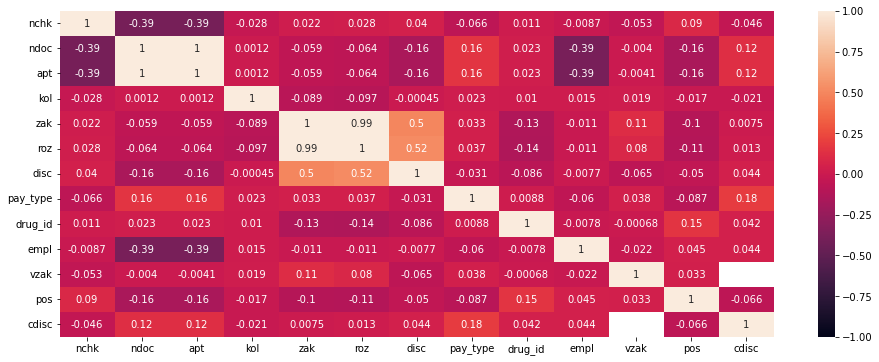

In [48]:
sns.heatmap(df.corr(), vmax=1, vmin=-1, annot=True)

Выделем в отдельный столбец час покупки.

In [49]:
df['hour'] = pd.to_datetime(df.c_time).dt.hour

In [50]:
df['hour'].head()

0    10
1    10
2    10
3    10
4    10
Name: hour, dtype: int64

In [51]:
df.head()

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos,cdisc,hour
0,11.08.2022,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925,200000000492,205,1,1.00,925.00,10
1,11.08.2022,10:27:46,2174,2004598,2,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,1.00,18.61,31.00,3.00,15,261519,Катрен г.Химки,9,200010010204,205,1,1.00,9.00,10
2,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,1.00,132.69,209.00,20.00,15,460864,Катрен г.Химки,9,200010010204,205,1,2.00,9.00,10
3,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,1.00,133.65,210.00,21.00,15,172823,Катрен г.Химки,9,200010010204,205,1,3.00,9.00,10
4,11.08.2022,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925,200000000492,205,1,1.00,925.00,10


Посмотрим на распределение кол-ва покупок по часам.

In [52]:
gr = df.groupby(['hour'])['kol'].agg(sum)

In [53]:
gr.head()

hour
8     20.10
9    236.50
10   361.65
11   326.55
12   311.59
Name: kol, dtype: float64

Постром боксплот для данных значений.

<AxesSubplot:xlabel='kol'>

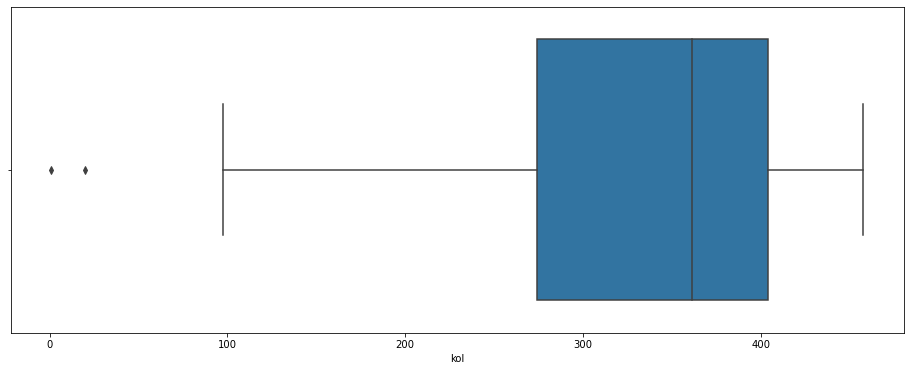

In [54]:
sns.boxplot(gr)

Сделаем группировку по нескольким полям.

In [55]:
df2 = df.groupby(['dt', 'nchk'])['kol', 'roz', 'zak'].agg({
    'kol': sum, 
    'roz': ['sum', 'max'],
    'zak': sum
})

In [56]:
df2.head()

kol    roz           zak
                 sum    sum    max    sum
dt         nchk                          
11.08.2022 1698 1.00 463.00 463.00 342.30
           1699 1.00 720.00 720.00 545.27
           1700 1.00  60.00  60.00  36.68
           1701 4.00 955.00 443.00 756.12
           1702 1.00  94.00  94.00  76.55

In [57]:
df2.reset_index().head()

dt  nchk  kol    roz           zak
                     sum    sum    max    sum
0  11.08.2022  1698 1.00 463.00 463.00 342.30
1  11.08.2022  1699 1.00 720.00 720.00 545.27
2  11.08.2022  1700 1.00  60.00  60.00  36.68
3  11.08.2022  1701 4.00 955.00 443.00 756.12
4  11.08.2022  1702 1.00  94.00  94.00  76.55

Попробуем посчитать доход от продаж в день на сотрудника.

In [58]:
revenue_df = df.groupby(['dt', 'empl'])['zak', 'roz'].agg(sum)

In [59]:
revenue_df['revenue'] = revenue_df['roz'] - revenue_df['zak']

In [60]:
revenue_df.head()

zak       roz  revenue
dt         empl                            
11.08.2022 25   72004.24  93030.00 21025.76
           30   90350.41 111916.97 21566.56
           36   62425.32  77368.03 14942.71
           47   68458.33  86626.01 18167.68
           50   72304.41  90830.01 18525.60

Рассчитаем доход с учетом количества, используя лямбда-функцию.

In [61]:
df.groupby(['dt', 'empl'])['zak', 'roz', 'kol'].apply(lambda x: sum(x['kol']*(x['roz'] - x['zak']))).reset_index().head()

,dt,empl,0
0,11.08.2022,25,20642.29
1,11.08.2022,30,20328.67
2,11.08.2022,36,14090.04
3,11.08.2022,47,16983.79
4,11.08.2022,50,17384.41


Используя библиотеку numpy рассчитаем среднее значение розничной цены для каждого препарата в течении дня.

In [62]:
df.groupby(['dt', 'drug'])['roz', 'kol'].agg({
    'roz': np.mean, 
    'kol': sum
}).head()

roz  kol
dt         drug                                                          
11.08.2022 911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ ОКОПНИК 100МЛ. ТУБА    111.00 1.00
           911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ САБЕЛЬНИК 100МЛ.       104.00 1.00
           L-ТИРОКСИН 150МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/         170.00 1.00
           L-ТИРОКСИН 50МКГ. №50 ТАБ. /БЕРЛИН ХЕМИ/            93.00 1.00
           ZD ТЕЙМУРОВА СПРЕЙ Д/НОГ П/ПОТА И ЗАПАХА 150МЛ....  96.00 1.00

Посмотрим как распределяется объем продаж в разрезе розничных цен препаратов (округлим значения до сотен).

In [63]:
df['rroz'] = df.roz.apply(lambda x: round(x, -2))

In [64]:
df3 = df.groupby(['dt','rroz'])['kol'].agg(sum).reset_index()

In [65]:
df3.head()

,dt,rroz,kol
0,11.08.2022,0.00,770.00
1,11.08.2022,100.00,742.00
2,11.08.2022,200.00,328.43
3,11.08.2022,300.00,196.20
4,11.08.2022,400.00,133.00


In [66]:
df3 = df3[df3.loc[:, 'rroz'] < 2000]

<AxesSubplot:xlabel='rroz', ylabel='kol'>

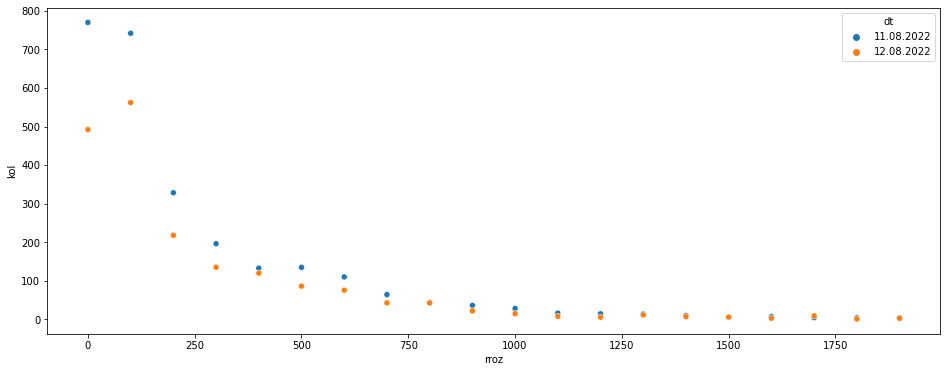

In [67]:
sns.scatterplot(df3.rroz, df3.kol,hue = df3.dt)

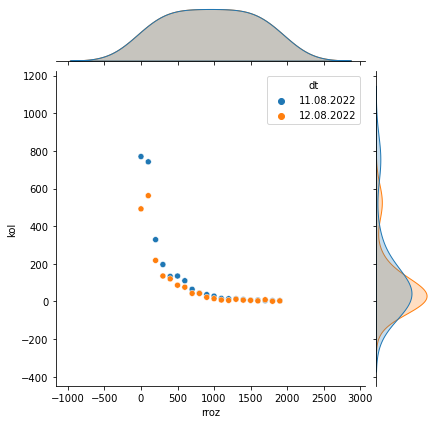

In [68]:
sns.jointplot(df3.rroz, df3.kol,hue = df3.dt)

Поработаем немного со сводными таблицами.

In [69]:
df4 = df.groupby(['dt','apt','empl', 'pay_type'], as_index = False)['kol'].agg(sum)

In [70]:
df4.head()

,dt,apt,empl,pay_type,kol
0,11.08.2022,2,123,15,151.05
1,11.08.2022,2,123,18,164.13
2,11.08.2022,2,205,15,65.11
3,11.08.2022,2,205,18,66.00
4,11.08.2022,6,25,15,95.00


In [71]:
df4.pivot_table(values= 'kol', index = ['dt','apt','empl'], columns= 'pay_type').head()

pay_type                15     18
dt         apt empl              
11.08.2022 2   123  151.05 164.13
               205   65.11  66.00
           6   25    95.00 142.53
           7   605   67.04 101.85
           11  30   179.00 310.48

In [72]:
df5 = df.pivot_table(values= 'roz', index = ['dt','apt','empl'], columns= 'pay_type', aggfunc= sum)

In [73]:
df5.head()

pay_type                  15       18
dt         apt empl                  
11.08.2022 2   123  55981.01 60697.02
               205  27403.00 32068.00
           6   25   27402.00 65628.00
           7   605  17618.00 19336.01
           11  30   38692.32 73224.65

In [74]:
df5 = df5.reset_index()
df5.head()

pay_type,dt,apt,empl,15,18
0,11.08.2022,2,123,55981.01,60697.02
1,11.08.2022,2,205,27403.00,32068.00
2,11.08.2022,6,25,27402.00,65628.00
3,11.08.2022,7,605,17618.00,19336.01
4,11.08.2022,11,30,38692.32,73224.65


In [75]:
pd.melt(df5, id_vars=['dt','apt','empl'], value_vars= [15, 18], var_name= 'p_type').head()

,dt,apt,empl,p_type,value
0,11.08.2022,2,123,15,55981.01
1,11.08.2022,2,205,15,27403.00
2,11.08.2022,6,25,15,27402.00
3,11.08.2022,7,605,15,17618.00
4,11.08.2022,11,30,15,38692.32


In [76]:
df.loc[:2, ['zak', 'roz'] ]

,zak,roz
0,41.08,51.00
1,18.61,31.00
2,132.69,209.00


In [77]:
df[(df['kol'] > 5) | (df['roz'] > 2000)].head()

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos,cdisc,hour,rroz
27,11.08.2022,11:50:16,2184,2004598,2,АКАТИНОЛ МЕМАНТИН 20МГ. №28 ТАБ. П/П/О /МЕРЦ Ф...,1.00,2545.84,2824.00,141.00,15,153467,ВИТТА КОМПАНИ ООО,9,200010014079,205,1,1.00,9.00,11,2800.00
29,11.08.2022,11:50:16,2184,2004598,2,ПРАДАКСА 110МГ. №60 КАПС. /БЕРИНГЕР/,1.00,3076.03,3432.00,171.00,15,154600,Протек,9,200010014079,205,1,5.00,9.00,11,3400.00
45,11.08.2022,13:10:54,2192,2004598,2,ЦЕФАЛИ АППАРАТ Д/ТЕРАПИИ МИГРЕНИ С ПРИНАДЛ.,1.00,11851.13,12345.00,0.00,18,455413,Протек,nan,nan,205,2,1.00,NaN,13,12300.00
62,11.08.2022,14:47:12,2201,2004598,2,ДЖАРДИНС 10МГ. №30 ТАБ. П/П/О /БЕРИНГЕР/,1.00,2669.94,2945.00,147.00,15,296849,Катрен г.Химки,9,200010024690,205,1,1.00,9.00,14,2900.00
65,11.08.2022,14:52:33,2203,2004598,2,"АКСАМОН 15МГ/МЛ. 1МЛ. №10 Р-Р Д/В/М,П/К АМП.",1.00,1559.37,2106.00,147.00,15,254247,Здравсервис,9,200010018590,205,1,1.00,9.00,14,2100.00


In [78]:
df[~df.loc[:, 'pay_type'].isin([15, 20])].head()

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos,cdisc,hour,rroz
0,11.08.2022,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925,200000000492,205,1,1.00,925.00,10,100.00
4,11.08.2022,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925,200000000492,205,1,1.00,925.00,10,800.00
5,11.08.2022,10:40:38,2176,2004598,2,БИСОПРОЛОЛ 5МГ. №60 ТАБ. П/П/О /ВЕРТЕКС/,1.00,152.90,182.00,9.00,18,187304,Пульс,9,200010001947,205,1,1.00,9.00,10,200.00
6,11.08.2022,10:40:38,2176,2004598,2,ТРИХОПОЛ 250МГ. №20 ТАБ. /ПОЛЬФАРМА/,1.00,67.94,85.00,4.00,18,1261,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,9,200010001947,205,1,2.00,9.00,10,100.00
7,11.08.2022,10:52:52,2177,2004598,2,НОРВАСК 5МГ. №30 ТАБ. /ПФАЙЗЕР/АПДЖОН/,1.00,157.76,189.00,9.00,18,2566,Катрен г.Химки,9,200010013331,205,1,3.00,9.00,10,200.00
